In [ ]:
#!pip install seaborn

In [ ]:
#!apt-get install libgl1-mesa-glx -y

In [2]:
import os
from tqdm.notebook import tqdm

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
from PIL import Image
import cv2

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# tqdm apply to pandas
tqdm.pandas()

# default paleets change
sns.set_palette('pastel')

# seaborn palettes
qualitative_colors = sns.color_palette('Set2', 10)
sequential_colors = sns.color_palette('RdPu', 10)
diverging_colors2 = sns.color_palette("RdBu", 2)
diverging_colors10 = sns.color_palette('RdBu', 10)
%matplotlib inline

In [3]:
train_img_path ='../input/data/train/images'
train_data_path = '../input/data/train/train.csv'
test_img_path = '../input/data/eval/images'
test_data_path = '../input/data/eval/info.csv'

In [4]:
df = pd.read_csv(train_data_path)

In [5]:
df.drop(["id","race"],axis=1,inplace=True)

In [6]:
df.head()

,gender,age,path
0,female,45,000001_female_Asian_45
1,female,52,000002_female_Asian_52
2,male,54,000004_male_Asian_54
3,female,58,000005_female_Asian_58
4,female,59,000006_female_Asian_59


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  2700 non-null   object
 1   age     2700 non-null   int64 
 2   path    2700 non-null   object
dtypes: int64(1), object(2)
memory usage: 63.4+ KB


In [8]:
print(f"데이터 갯수: {len(df)}")
print(f"feature 갯수: {len(df.columns)}")
print(f"Features: {list(df.columns)}")
df.isnull().sum()

데이터 갯수: 2700
feature 갯수: 3
Features: ['gender', 'age', 'path']


gender    0
age       0
path      0
dtype: int64

In [9]:
df_eval = pd.read_csv(test_data_path)
df_eval.head()

,ImageID,ans
0,cbc5c6e168e63498590db46022617123f1fe1268.jpg,0
1,0e72482bf56b3581c081f7da2a6180b8792c7089.jpg,0
2,b549040c49190cedc41327748aeb197c1670f14d.jpg,0
3,4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg,0
4,248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg,0


In [10]:
df_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ImageID  12600 non-null  object
 1   ans      12600 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 197.0+ KB


In [11]:
print(f"데이터 갯수: {len(df_eval)}")
print(f"feature 갯수: {len(df_eval.columns)}")
print(f"Features: {list(df_eval.columns)}")

데이터 갯수: 12600
feature 갯수: 2
Features: ['ImageID', 'ans']


In [12]:
print(f"성별: {list(df.gender.unique())}")
df.gender.value_counts()

성별: ['female', 'male']


female    1658
male      1042
Name: gender, dtype: int64

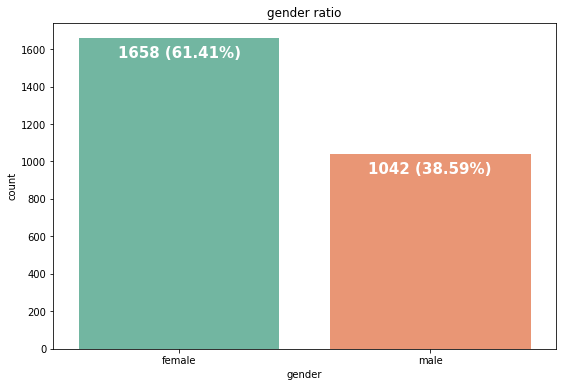

In [13]:
plt.figure(figsize=(9, 6))
ax = sns.countplot(x='gender', data=df, palette=qualitative_colors)
for p in ax.patches:
    ax.annotate(f"{p.get_height()} ({(p.get_height()/len(df))*100:.2f}%)", (p.get_x()+p.get_width()/2., (p.get_height()-80)),
                  ha='center', va='center', fontsize=15,fontweight='bold',color='w')
plt.title("gender ratio")
plt.show()

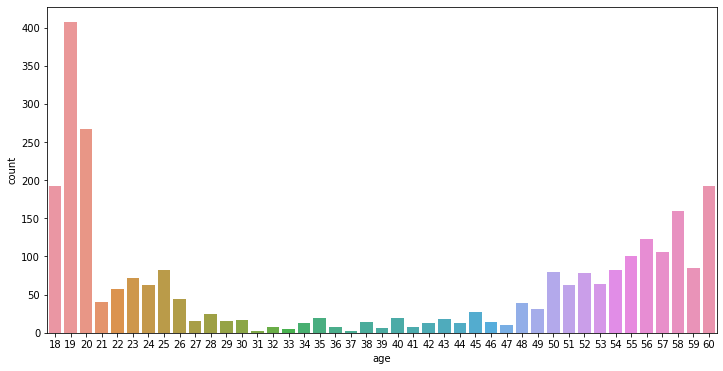

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='age', data=df)
plt.show()

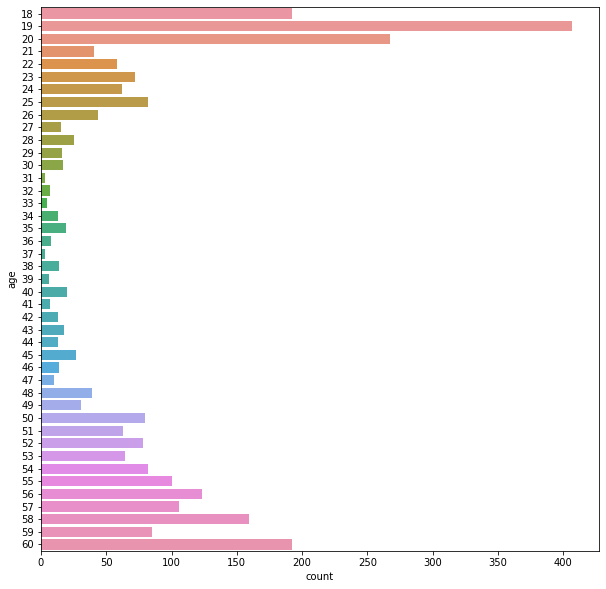

In [15]:
plt.figure(figsize=(10, 10))
sns.countplot(y='age', data=df,orient='h')
plt.show()

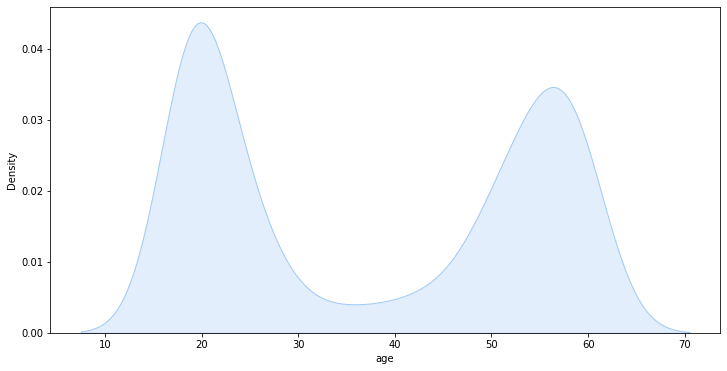

In [16]:
plt.figure(figsize=(12, 6))
sns.kdeplot(x='age', data=df, fill=True, alpha=0.3)
plt.show()

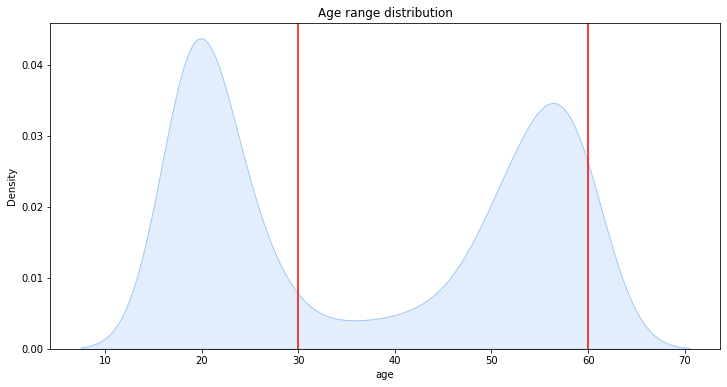

In [17]:
plt.figure(figsize=(12, 6))
g1 = sns.kdeplot(data=df, x='age', fill=True, alpha=0.3)
plt.axvline(30, c='red')
plt.axvline(60, c='red')
plt.title('Age range distribution')
plt.show()

In [18]:
def get_age(x): 
    if x <30:
        return 0
    elif x >=30 and x <60:
        return 1
    else:
        return 2
    
df['age_range'] = df['age'].apply(lambda x : get_age(x))
df

,gender,age,path,age_range
0,female,45,000001_female_Asian_45,1
1,female,52,000002_female_Asian_52,1
2,male,54,000004_male_Asian_54,1
3,female,58,000005_female_Asian_58,1
4,female,59,000006_female_Asian_59,1
...,...,...,...,...
2695,male,19,006954_male_Asian_19,0
2696,male,19,006955_male_Asian_19,0
2697,male,19,006956_male_Asian_19,0
2698,male,20,006957_male_Asian_20,0


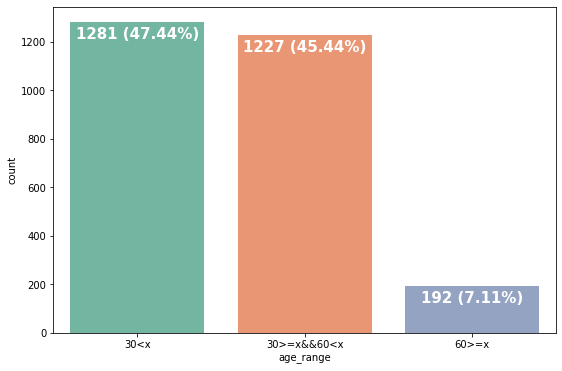

In [19]:
plt.figure(figsize=(9, 6))
ax = sns.countplot(x='age_range', data=df, palette=qualitative_colors)

#plt.xticks(np.arange(3), ['30미만', '30이상&&60미만', "60이상"])
plt.xticks(np.arange(3), ['30<x', '30>=x&&60<x', "60>=x"])

counts = df.age_range.value_counts()
count_sum = sum(counts)
for p in ax.patches:
    ax.annotate(f"{p.get_height()} ({(p.get_height()/count_sum*100):.2f}%)", (p.get_x()+p.get_width()/2., p.get_height()-50),
                  ha='center', va='center', fontsize=15,fontweight='bold',color='w')

plt.show()

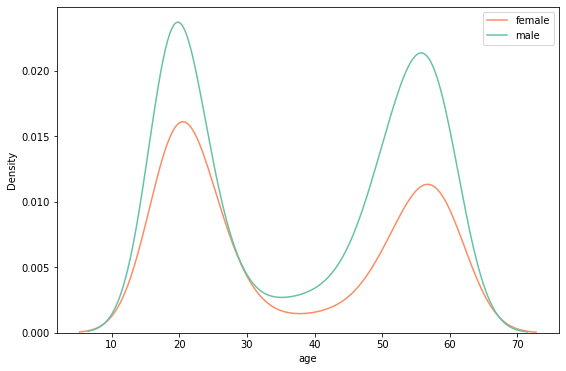

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
sns.set_palette(qualitative_colors,2)

sns.kdeplot(data=df, x='age', hue='gender', ax=ax)

plt.legend(['female', 'male'])

plt.show()

In [21]:
table=pd.pivot_table(df,index='age_range',columns='gender',values='path',aggfunc='count')
table.index = ['x<30', 'x>=30&&x<60', 'x>60']
table.head()

gender,female,male
x<30,732,549
x>=30&&x<60,817,410
x>60,109,83


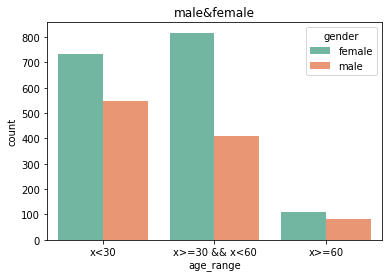

In [22]:
ax=sns.countplot('age_range', hue='gender', data=df)
sns.set_palette(qualitative_colors)
ax.set_xticklabels(['x<30', 'x>=30 && x<60', 'x>=60'])
ax.set_title('male&female')
plt.show()

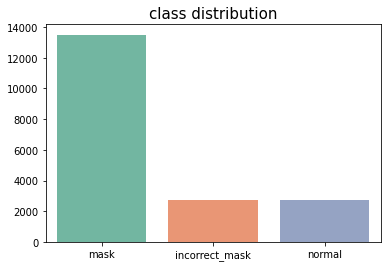

In [23]:
total = len(df) * 7
labels = ['mask', 'incorrect_mask', 'normal']
val = [(len(df)*5), (len(df)*1), (len(df)*1)]

g = sns.barplot(x=labels, y=val, palette=qualitative_colors)

ax.set_xlabel('class' , fontsize=15)
ax.set_ylabel('count', fontsize=15)
g.set_title('class distribution', fontsize=15)
plt.show()

In [24]:
import itertools

gender = ['male', 'female']
age_bin = [0, 1, 2]
mask = ['wear', 'incorrect', 'not wear']

classes = list(itertools.product(mask, gender, age_bin))
classes

[('wear', 'male', 0),
 ('wear', 'male', 1),
 ('wear', 'male', 2),
 ('wear', 'female', 0),
 ('wear', 'female', 1),
 ('wear', 'female', 2),
 ('incorrect', 'male', 0),
 ('incorrect', 'male', 1),
 ('incorrect', 'male', 2),
 ('incorrect', 'female', 0),
 ('incorrect', 'female', 1),
 ('incorrect', 'female', 2),
 ('not wear', 'male', 0),
 ('not wear', 'male', 1),
 ('not wear', 'male', 2),
 ('not wear', 'female', 0),
 ('not wear', 'female', 1),
 ('not wear', 'female', 2)]

In [25]:
counts = []
for mask, gender, age in classes:
    count = df[(df['gender']==gender)&(df['age_range']==age)].shape[0]
    if mask=='wear':
        count = count*5
    counts.append(count)
counts

[2745,
 2050,
 415,
 3660,
 4085,
 545,
 549,
 410,
 83,
 732,
 817,
 109,
 549,
 410,
 83,
 732,
 817,
 109]

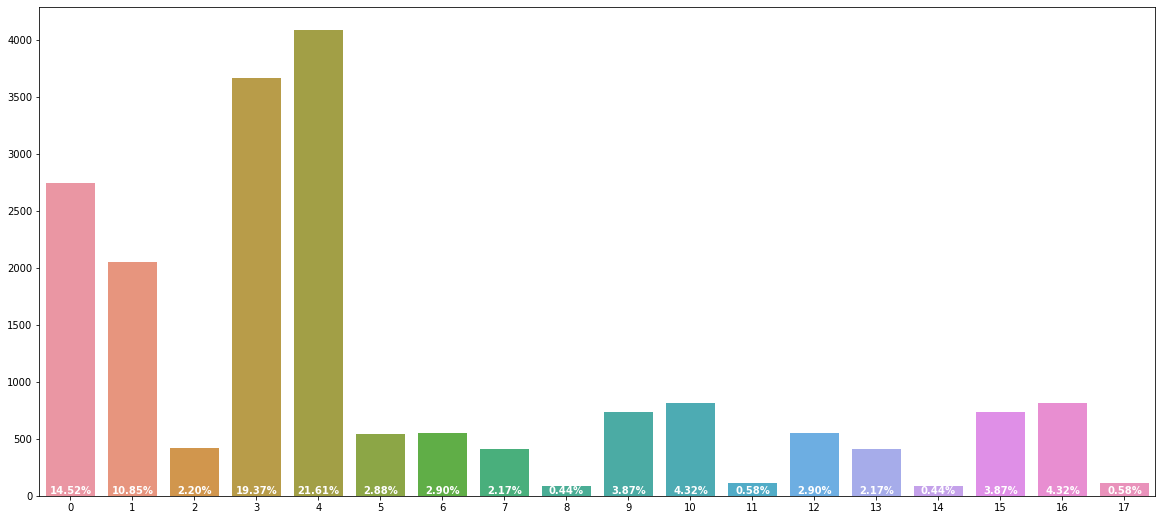

In [26]:

plt.figure(figsize=(20, 9))
ax = sns.barplot(x=np.arange(18), y=counts)

count_sum = sum(counts)
for p in ax.patches:
    ax.annotate(f"{(p.get_height()/count_sum*100):.2f}%", (p.get_x()+p.get_width()/2.,50),
                  ha='center', va='center', fontsize=15,fontweight='bold',color='w', size=10)

plt.show()

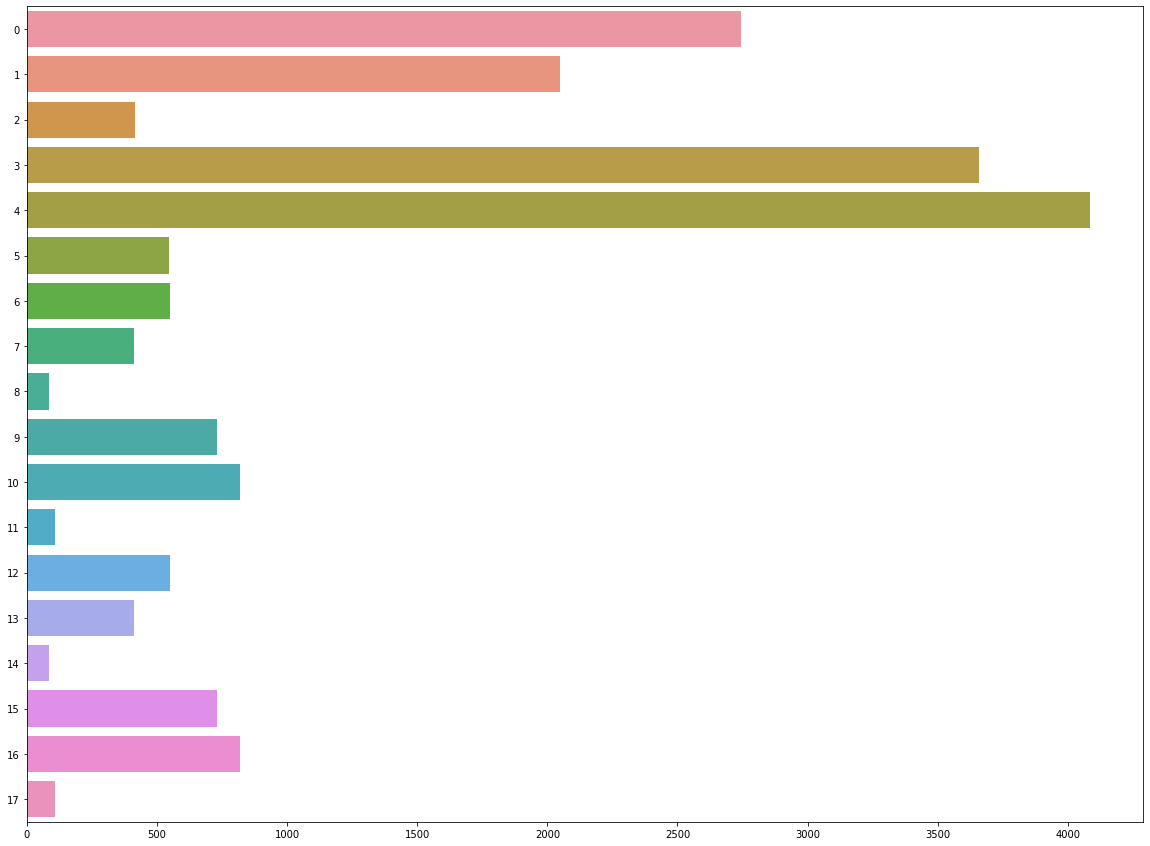

In [33]:
plt.figure(figsize=(20, 15))
ax = sns.barplot(y=np.arange(18), x=counts,orient='h')

plt.show()

    gender  age                  path  age_range
170   male   56  000550_male_Asian_56          1


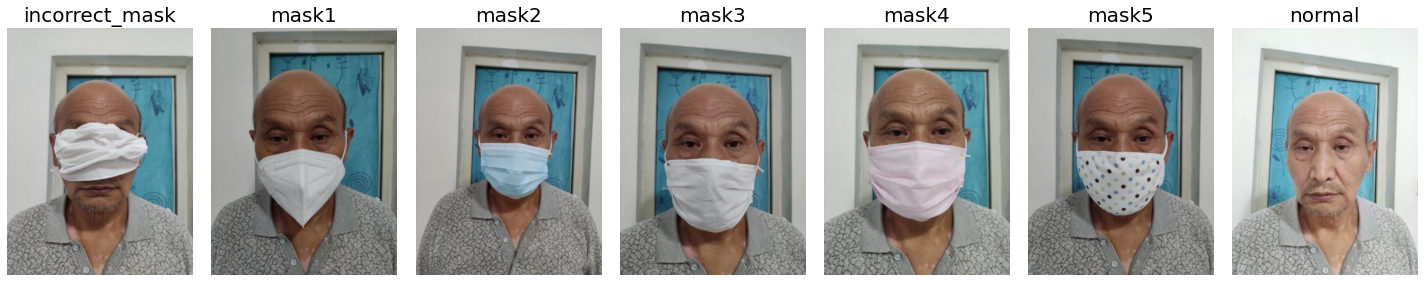

In [45]:
sample = df.sample(1)
sample_img_path = sample.path.values
img_list = []

for img in sample_img_path:
    lists = []
    imgs = [img for img in os.listdir(train_img_path+'/'+img) if '._' not in img]
    
    for data in imgs:
        path = train_img_path+'/'+img+'/'+data
        img_kind = data.split('.')[0]
        lists.append(path)
    lists = sorted(lists)
    img_list.append(lists)
    fig = plt.figure(figsize=(20, 15))

i=1
print(sample)

for files in img_list:
    for filename in files:
        img = cv2.imread(filename)
        ax = fig.add_subplot(1, 7, i)
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')
        
        if i < 8:
            ax.set_title(filename.split('/')[-1].split('.')[0], fontsize=20)
        
        i += 1

plt.tight_layout()
plt.show()